# Pima Indians Diabetes Database

In this notebook, I will try and explore the Pima Indians Diabetes Database. I picked this database from Kaggle. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Objective:
- To predict the onset of diabetes based on diagnostic measures.

I'm starting with importing the necessary libraries:

In [2]:
import pandas as pd # data processing, csv file input/output
import numpy as np # linear algebra
import matplotlib.pyplot as plt # as the name says: plotting graphs
%matplotlib inline
import seaborn as sn # better visuals
color = sn.color_palette()

#### Exploring the 'diabetes.csv' dataset:

In [5]:
# I'll first read the csv file as a dataframe object and then look at its top 10 rows:
db = pd.read_csv('diabetes.csv')
db.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


So this dataset has 9 columns. Consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. The diagnostic measures are given from second column (Glucose) to seventh column (DiabetesPedigreeFunction).

In [6]:
# Checking total number of rows in dataset:
db.shape

(768, 9)

So it's a data of 768 females. Now I'll check if there's any missing value in the dataset:

In [7]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values. I'll now check statistics of the dataset:

In [8]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The minimum age of the patients is 21 years and the maximum age is 81 years.

The mean and median(50 percentile) of almost all variables are very close to each other. For ex in:
- Pregnancies data: mean= 3.84 & median= 3.00 (There's a patient who has had upto 17 pregnancies!)
- Glucose data: mean= 120.89 & median= 117.00

On the other hand, the Insuling data is: mean= 79.79 & median= 30.50 (Very big difference)

This means that other than Insulin, data of all other variables is symmetrically spread out (Symmetrical Distribution). But the data distribution of Insulin is Unsymmetrical. To be sure with the distribution symmetry, I'm plotting histograms for all the variables one by one:

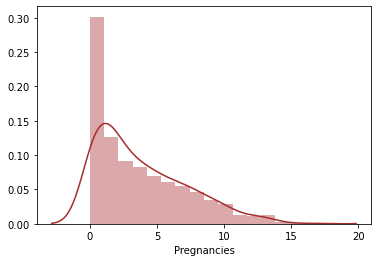

In [64]:
sn.distplot(db['Pregnancies'], color='brown')

This is a right-skewed distribution. This is showing the following:
- minimum value of the distribution= 0
- maximum value of the distributioni= 15
- the median value= 3 (because 15/2 = 7.5 and at x=7.5 we have y=3)
- the mode looks like either 1 or 2

In [19]:
# Verifying the mode of Pregnancies:
db['Pregnancies'].mode()

0    1
dtype: int64

So the mode of Pregnancies is 1 and datatype is 'int' (Obviously)

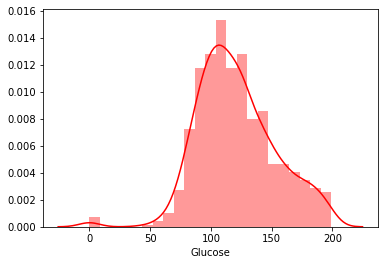

In [41]:
sn.distplot(db['Glucose'], color='red')

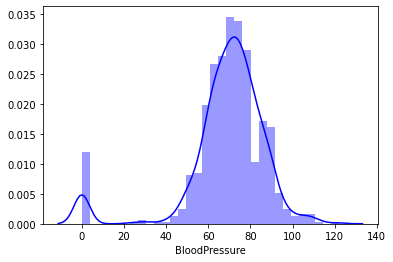

In [44]:
sn.distplot(db['BloodPressure'],color='blue')

This little peak at the left is giving a danger alert. Some of the patients have extremely low bloodpressure! Doctors need to look over them immediately!

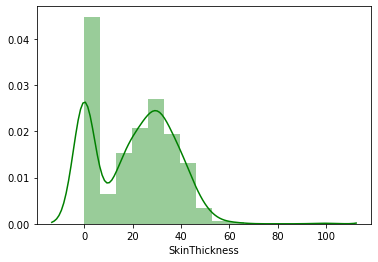

In [45]:
sn.distplot(db['SkinThickness'],color='green')

Now this is a bimodal distribution. This shows a lot of patients don't have any skin thickness.

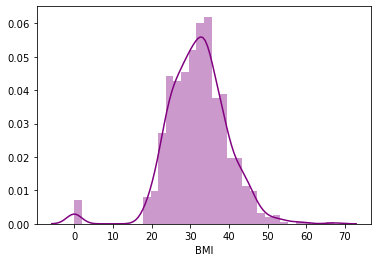

In [46]:
sn.distplot(db['BMI'], color='purple')

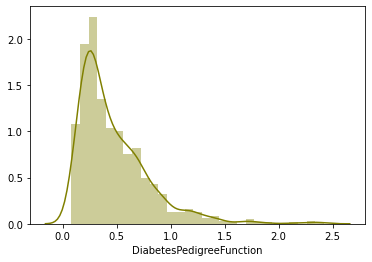

In [65]:
sn.distplot(db['DiabetesPedigreeFunction'],color='olive')

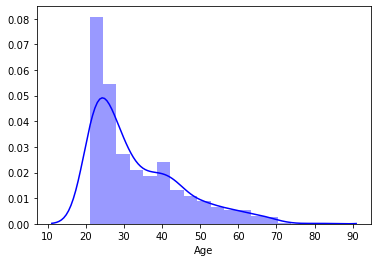

In [49]:
sn.distplot(db['Age'],color='blue')

Minimum age of the patients is 21 years. It also looks like the mode of age is 21 years as well. Let me verify:

In [21]:
db['Age'].mode()

0    22
dtype: int64

Okay so the most common age among patients is 22 years. And the number of patients of various ages are:

In [23]:
db['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

There are 72 patients of age 22 years, 63 patients of age 21 years and so on.

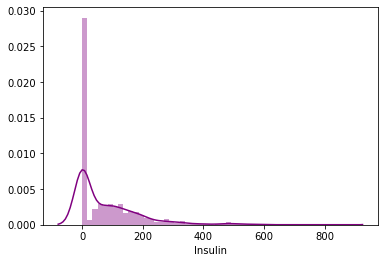

In [51]:
sn.distplot(db['Insulin'], bins=50, color='purple')

Now this Insulin distribution is heavily right-skewed. Let me check if I can improve this distribution:

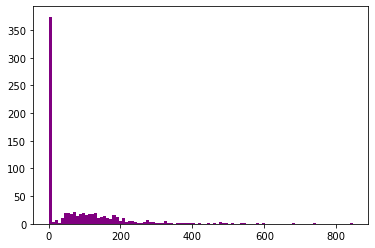

In [62]:
plt.hist(db['Insulin'], bins=100, color='purple', label='Insulin', density=False)
plt.show()

Looks like the mode is 1. Verifying:

In [63]:
db['Insulin'].mode()

0    0
dtype: int64

So the most common insulin value/content among the patients is 0. 

Let me now check how many patients have diabetes:

In [76]:
db['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

So 268 patients in the given dataset have diabetes, and 500 do not.

Checking if there's any relation between pregnancy and diabetes:

In [77]:
pd.crosstab(db['Pregnancies'],db['Outcome'])

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


This shows 73 females with 0 pregnancies till date do not have diabetes but 38 such females have diabetes. Similarly 106 females with 1 pregnancy till date do not have diabetes but 29 such females have diabetes. And so on. From the two-way table it appears that pregnancy has no relation with diabetes in patients.

I'll now plot the correlation plot to check relations between all the variables with each other in one go:

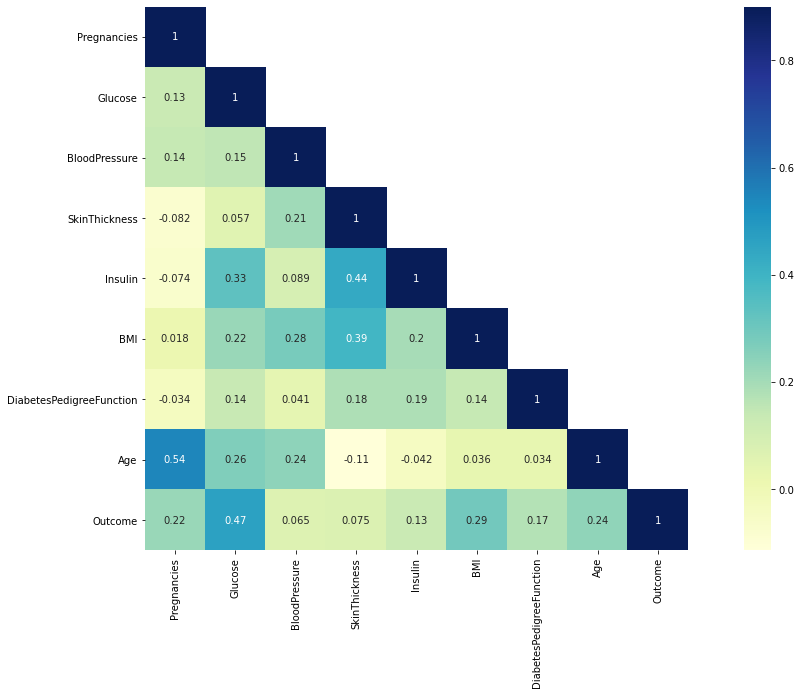

In [78]:
corr= db.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True, cmap='YlGnBu')

Clearly Glucose has the strongest impact with diabetes in patients. Followed by BMI, Age, Pregnancies, DiabetesPedegreeFunction, Insulin, SkinThickness, and finally BloodPressure. Arranging in most severe reason to least severe:
1. Glucose
2. BMI
3. Age
4. Pregnancies
5. DiabetesPedegreeFunction
6. Insulin
7. SkinThickness
8. BloodPressure

### Training my model:

Firstly, I'll create a set of independent variables from the train dataset. So I'm dropping the 'Outcome' variable from it using axis=1. This axis=1 specifies that the drop shall happen from the column. I'll store this set in an object called "x" as follows:

In [81]:
x = db.drop('Outcome',axis=1)

Now I need my separate target variable. So keeping only the 'Outcome' variable in an object y:

In [82]:
y = db['Outcome']

I'll now split the original db dataset into train & test datasets. So for the purpose of splitting I'll use a module called "Model Selection". In that module I'll use the "train_test_split" function as follows:

In [83]:
from sklearn.model_selection import train_test_split

This split function accepts an independent variable 'x' & a dependent variable 'y', and then split them into two parts. First is independent variable for train and independent variable for test. And then dependent variable for train and dependent variable for test. I'm naming them as train_x, test_x, train_y & test_y sets respectively as follows:

In [124]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=11, shuffle=True, train_size=None, test_size=None)

In the brackets there are various parameters. During the scoring stage, these parameters can be adjusted to get the best model score or accuracy.

I'll now train my model using Random Forest Classifier to predict the onset of diabetes in patients:

In [125]:
# Importing the Random Forest Classifier which is inside the module called Ensemble in scikit learn:
from sklearn.ensemble import RandomForestClassifier

Creating an object for the Random Forest Classifier so that I can use the "fit" & the "predict" functions on it. I'm naming the object as rfc and taking the parameter n_estimators = 100:

In [126]:
rfc = RandomForestClassifier(n_estimators = 100)

Running the fit function on train_x & train_y using my RandomForestClassifier model as follows:

In [127]:
rfc.fit(train_x,train_y)

RandomForestClassifier()

Now using the score function with rfc. Using it 1st on train_x & train_y and then on test_x & test_y as follows:

In [128]:
rfc.score(train_x,train_y)

1.0

In [129]:
rfc.score(test_x,test_y)

0.7708333333333334

So there's 100 % accuracy on my train dataset & around 80% accuracy on the test dataset.

This completes my task. Thank you for taking the time to view my notebook. Best regards.
- Rachit Shukla